In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from decimal import Decimal

# Reading the CSV files
The training and testing data sets are saved into their respective DataFrames

In [2]:
# Replace these with your own file locations
esrb_train = pd.read_csv(r"Video_games_esrb_rating_no_duplicates.csv")
esrb_test = pd.read_csv(r"test_esrb_no_duplicates.csv")

In [3]:
esrb_train.head()

title  console  alcohol_reference  \
0         Monster Jam Steel Titans 2        1                  0   
1             Subnautica: Below Zero        1                  0   
2  NIER REPLICANT VER.1.22474487139…        1                  0   
3                         Jamestown+        0                  0   
4             Neptunia Virtual Stars        0                  0   

   animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  \
0               0      0               0                 0            0   
1               1      0               0                 0            0   
2               0      1               0                 0            0   
3               0      0               0                 0            0   
4               0      0               0                 0            0   

   drug_reference  fantasy_violence  ...  sexual_content  sexual_themes  \
0               0                 0  ...               0              0   
1               0                 0  ...               0              0   
2               0                 0  ...               0              0   
3               0                 1  ...               0              0   
4               0                 1  ...               0              0   

   simulated_gambling  strong_janguage  strong_sexual_content  \
0                   0                0                      0   
1                   0                0                      0   
2                   0                1                      0   
3                   0                0                      0   
4                   0                0                      0   

   suggestive_themes  use_of_alcohol  use_of_drugs_and_alcohol  violence  \
0                  0               0                         0         0   
1                  0               0                         0         0   
2                  1               0                         0         0   
3                  0               0                         0         0   
4                  1               0                         0         0   

   esrb_rating  
0            E  
1           ET  
2            M  
3           ET  
4            T  

[5 rows x 34 columns]

In [4]:
esrb_test.head()

title  console  alcohol_reference  \
0                              Still Time        0                  0   
1                       Surf World Series        1                  0   
2  The Metronomicon: Slay the Dance Floor        1                  0   
3                             Windjammers        0                  0   
4      Rock of Ages 2: Bigger and Boulder        0                  0   

   animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  \
0               0      1               0                 0            0   
1               0      0               0                 0            0   
2               0      0               1                 0            0   
3               0      0               0                 0            0   
4               0      0               0                 0            1   

   drug_reference  fantasy_violence  ...  sexual_content  sexual_themes  \
0               0                 0  ...               0              0   
1               0                 0  ...               0              0   
2               0                 1  ...               0              0   
3               0                 0  ...               0              0   
4               0                 0  ...               0              0   

   simulated_gambling  strong_janguage  strong_sexual_content  \
0                   0                0                      0   
1                   0                0                      0   
2                   0                0                      0   
3                   0                0                      0   
4                   0                0                      0   

   suggestive_themes  use_of_alcohol  use_of_drugs_and_alcohol  violence  \
0                  0               0                         0         1   
1                  0               0                         0         0   
2                  0               0                         0         0   
3                  0               0                         0         0   
4                  0               0                         0         0   

   esrb_rating  
0            T  
1            E  
2            T  
3            E  
4           ET  

[5 rows x 34 columns]

# Information about datasets

In [5]:
print("Training dataset shape:",esrb_train.shape)
print("Testing dataset shape:",esrb_test.shape)

Training dataset shape: (1883, 34)
Testing dataset shape: (493, 34)


In [6]:
esrb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1883 non-null   object
 1   console                   1883 non-null   int64 
 2   alcohol_reference         1883 non-null   int64 
 3   animated_blood            1883 non-null   int64 
 4   blood                     1883 non-null   int64 
 5   blood_and_gore            1883 non-null   int64 
 6   cartoon_violence          1883 non-null   int64 
 7   crude_humor               1883 non-null   int64 
 8   drug_reference            1883 non-null   int64 
 9   fantasy_violence          1883 non-null   int64 
 10  intense_violence          1883 non-null   int64 
 11  language                  1883 non-null   int64 
 12  lyrics                    1883 non-null   int64 
 13  mature_humor              1883 non-null   int64 
 14  mild_blood              

In [7]:
esrb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     493 non-null    object
 1   console                   493 non-null    int64 
 2   alcohol_reference         493 non-null    int64 
 3   animated_blood            493 non-null    int64 
 4   blood                     493 non-null    int64 
 5   blood_and_gore            493 non-null    int64 
 6   cartoon_violence          493 non-null    int64 
 7   crude_humor               493 non-null    int64 
 8   drug_reference            493 non-null    int64 
 9   fantasy_violence          493 non-null    int64 
 10  intense_violence          493 non-null    int64 
 11  language                  493 non-null    int64 
 12  lyrics                    493 non-null    int64 
 13  mature_humor              493 non-null    int64 
 14  mild_blood                

All but two of the columns are integers, and there are no missing values.

In [8]:
esrb_train.describe()

console  alcohol_reference  animated_blood        blood  \
count  1883.000000        1883.000000     1883.000000  1883.000000   
mean      0.475836           0.050451        0.010090     0.228359   
std       0.499548           0.218933        0.099969     0.419887   
min       0.000000           0.000000        0.000000     0.000000   
25%       0.000000           0.000000        0.000000     0.000000   
50%       0.000000           0.000000        0.000000     0.000000   
75%       1.000000           0.000000        0.000000     0.000000   
max       1.000000           1.000000        1.000000     1.000000   

       blood_and_gore  cartoon_violence  crude_humor  drug_reference  \
count     1883.000000       1883.000000  1883.000000     1883.000000   
mean         0.126394          0.019649     0.054700        0.033988   
std          0.332381          0.138829     0.227454        0.181247   
min          0.000000          0.000000     0.000000        0.000000   
25%          0.000000          0.000000     0.000000        0.000000   
50%          0.000000          0.000000     0.000000        0.000000   
75%          0.000000          0.000000     0.000000        0.000000   
max          1.000000          1.000000     1.000000        1.000000   

       fantasy_violence  intense_violence  ...  partial_nudity  \
count       1883.000000       1883.000000  ...     1883.000000   
mean           0.220393          0.118428  ...        0.013277   
std            0.414622          0.323200  ...        0.114487   
min            0.000000          0.000000  ...        0.000000   
25%            0.000000          0.000000  ...        0.000000   
50%            0.000000          0.000000  ...        0.000000   
75%            0.000000          0.000000  ...        0.000000   
max            1.000000          1.000000  ...        1.000000   

       sexual_content  sexual_themes  simulated_gambling  strong_janguage  \
count     1883.000000    1883.000000         1883.000000      1883.000000   
mean         0.034519       0.056824            0.067446         0.118959   
std          0.182608       0.231568            0.250859         0.323826   
min          0.000000       0.000000            0.000000         0.000000   
25%          0.000000       0.000000            0.000000         0.000000   
50%          0.000000       0.000000            0.000000         0.000000   
75%          0.000000       0.000000            0.000000         0.000000   
max          1.000000       1.000000            1.000000         1.000000   

       strong_sexual_content  suggestive_themes  use_of_alcohol  \
count            1883.000000        1883.000000     1883.000000   
mean                0.035582           0.117897        0.015932   
std                 0.185294           0.322572        0.125246   
min                 0.000000           0.000000        0.000000   
25%                 0.000000           0.000000        0.000000   
50%                 0.000000           0.000000        0.000000   
75%                 0.000000           0.000000        0.000000   
max                 1.000000           1.000000        1.000000   

       use_of_drugs_and_alcohol     violence  
count               1883.000000  1883.000000  
mean                   0.015932     0.063728  
std                    0.125246     0.244333  
min                    0.000000     0.000000  
25%                    0.000000     0.000000  
50%                    0.000000     0.000000  
75%                    0.000000     0.000000  
max                    1.000000     1.000000  

[8 rows x 32 columns]

In [9]:
esrb_test.describe()

console  alcohol_reference  animated_blood       blood  \
count  493.000000         493.000000      493.000000  493.000000   
mean     0.494929           0.052738        0.002028    0.247465   
std      0.500482           0.223738        0.045038    0.431977   
min      0.000000           0.000000        0.000000    0.000000   
25%      0.000000           0.000000        0.000000    0.000000   
50%      0.000000           0.000000        0.000000    0.000000   
75%      1.000000           0.000000        0.000000    0.000000   
max      1.000000           1.000000        1.000000    1.000000   

       blood_and_gore  cartoon_violence  crude_humor  drug_reference  \
count      493.000000        493.000000   493.000000      493.000000   
mean         0.133874          0.022312     0.040568        0.030426   
std          0.340863          0.147847     0.197487        0.171931   
min          0.000000          0.000000     0.000000        0.000000   
25%          0.000000          0.000000     0.000000        0.000000   
50%          0.000000          0.000000     0.000000        0.000000   
75%          0.000000          0.000000     0.000000        0.000000   
max          1.000000          1.000000     1.000000        1.000000   

       fantasy_violence  intense_violence  ...  partial_nudity  \
count        493.000000        493.000000  ...      493.000000   
mean           0.263692          0.075051  ...        0.058824   
std            0.441082          0.263741  ...        0.235533   
min            0.000000          0.000000  ...        0.000000   
25%            0.000000          0.000000  ...        0.000000   
50%            0.000000          0.000000  ...        0.000000   
75%            1.000000          0.000000  ...        0.000000   
max            1.000000          1.000000  ...        1.000000   

       sexual_content  sexual_themes  simulated_gambling  strong_janguage  \
count      493.000000     493.000000          493.000000       493.000000   
mean         0.020284       0.010142            0.022312         0.052738   
std          0.141113       0.100297            0.147847         0.223738   
min          0.000000       0.000000            0.000000         0.000000   
25%          0.000000       0.000000            0.000000         0.000000   
50%          0.000000       0.000000            0.000000         0.000000   
75%          0.000000       0.000000            0.000000         0.000000   
max          1.000000       1.000000            1.000000         1.000000   

       strong_sexual_content  suggestive_themes  use_of_alcohol  \
count             493.000000         493.000000      493.000000   
mean                0.050710           0.077079        0.087221   
std                 0.219628           0.266988        0.282445   
min                 0.000000           0.000000        0.000000   
25%                 0.000000           0.000000        0.000000   
50%                 0.000000           0.000000        0.000000   
75%                 0.000000           0.000000        0.000000   
max                 1.000000           1.000000        1.000000   

       use_of_drugs_and_alcohol    violence  
count                493.000000  493.000000  
mean                   0.050710    0.312373  
std                    0.219628    0.463932  
min                    0.000000    0.000000  
25%                    0.000000    0.000000  
50%                    0.000000    0.000000  
75%                    0.000000    1.000000  
max                    1.000000    1.000000  

[8 rows x 32 columns]

As expected, each of the columns that contain binary data have a minimum of 0 and a maximum of 1 with no inbetween values, as they should. Humorously, the only error seems to be that the "strong_language" attribute is mislabeled as "strong_janguage".

In [10]:
# Fixing the mislabeled column...
esrb_train = esrb_train.rename(columns={"strong_janguage": "strong_language"})
esrb_test = esrb_test.rename(columns={"strong_janguage": "strong_language"})

# Dealing with Duplicates

In [11]:
print(esrb_train.duplicated().sum())
print(esrb_test.duplicated().sum())
esrb_test[esrb_test.duplicated(keep=False)]

0
0


Empty DataFrame
Columns: [title, console, alcohol_reference, animated_blood, blood, blood_and_gore, cartoon_violence, crude_humor, drug_reference, fantasy_violence, intense_violence, language, lyrics, mature_humor, mild_blood, mild_cartoon_violence, mild_fantasy_violence, mild_language, mild_lyrics, mild_suggestive_themes, mild_violence, no_descriptors, nudity, partial_nudity, sexual_content, sexual_themes, simulated_gambling, strong_language, strong_sexual_content, suggestive_themes, use_of_alcohol, use_of_drugs_and_alcohol, violence, esrb_rating]
Index: []

[0 rows x 34 columns]

Any existing duplicates were removed from the CSVs directly (hence the file names) before the files were imported since there were very few duplicates. Specifically, there were 12 records removed from the training database and 7 removed from the testing database.

# Datasets Details

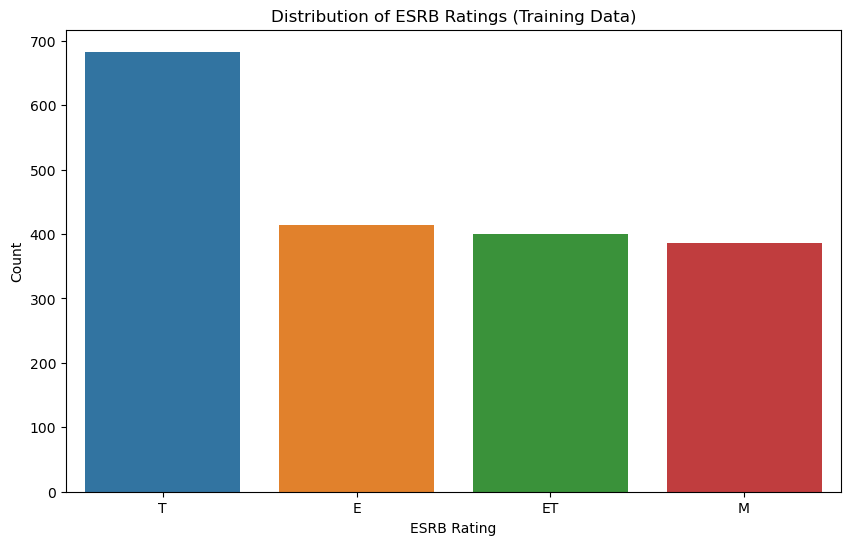

Exact counts:


T     683
E     414
ET    400
M     386
Name: esrb_rating, dtype: int64

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=esrb_train, x='esrb_rating', order=esrb_train['esrb_rating'].value_counts().index)
plt.title("Distribution of ESRB Ratings (Training Data)")
plt.xlabel("ESRB Rating")
plt.ylabel("Count")
plt.show()

print("Exact counts:")
esrb_train.esrb_rating.value_counts()

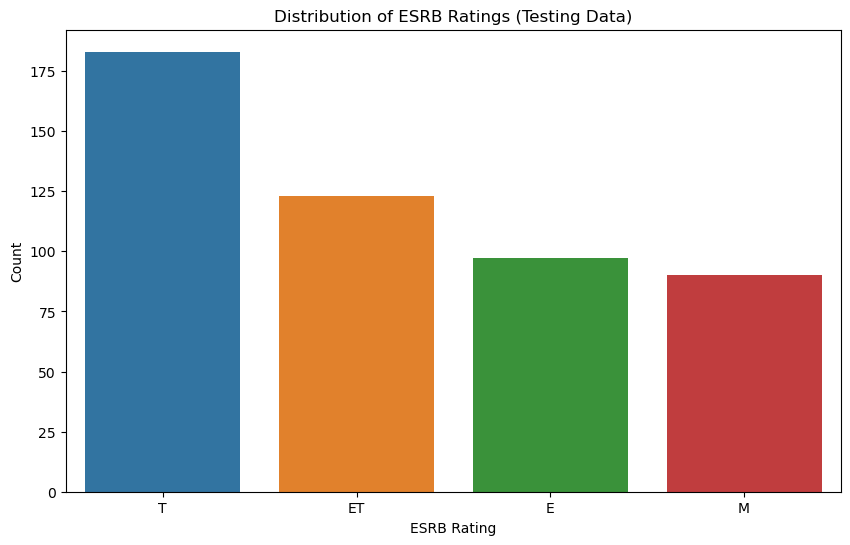

Exact counts:


T     183
ET    123
E      97
M      90
Name: esrb_rating, dtype: int64

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=esrb_test, x='esrb_rating', order=esrb_test['esrb_rating'].value_counts().index)
plt.title("Distribution of ESRB Ratings (Testing Data)")
plt.xlabel("ESRB Rating")
plt.ylabel("Count")
plt.show()

print("Exact counts:")
esrb_test.esrb_rating.value_counts()

Percentage wise, the distribution of the four ESRB ratings included in the datasets is about even between the training and testing data. "T" makes up slightly over a third of each set (36.3% in training, 37.1% in testing), "M" is roughly a fifth of each set (20.5% in training, 18.3% in testing), and "E" and "ET" are both slightly higher than "M" ("E": 22.0% in training, 19.7% in testing; "ET": 21.2% in training, 24.9% in testing).

The differences in distribution are small, so they should not affect the performance of any predictive models significantly.

In [14]:
# Finding what percentage of the data is testing data...
esrb_test.shape[0]/(esrb_train.shape[0] + esrb_test.shape[0])

0.2074915824915825

Roughly 20% of the data between the training and testing files is reserved for testing the model, which is acceptable.

# Splitting the data

In [15]:
# Due to how the data set is formatted (two files: one for training, one for testing), there is no real need 
# to use test_train_split. Instead, the data can be manually put into the corresponding train and test groups.

# The "title" and "console" "esrb_rating" columns are dropped from the DataFrames because they should have no
# influence on the ESRB rating of the game. Games are given ESRB ratings based on their content, and the console
# a game can be played on has no influence on this. Furthermore, the title of a game is designed to be marketable,
# so it should never be a reason to raise a game's ESRB rating.

# Splitting the training data
X_train = esrb_train.drop(["title", "console", "esrb_rating"], axis=1)
y_train = esrb_train['esrb_rating']

# Splitting the testing data
X_test = esrb_test.drop(['title', 'console', 'esrb_rating'], axis=1)
y_test = esrb_test['esrb_rating']

Since all of the attributes/variables are binary in nature, there is no need to scale/transform the data.

# Data Model #1: Bernoulli Naive Bayes
Since all of the attributes/features in X are binomial in nature, Bernoulli Naive Bayes seemed like a good model to start with.

In [16]:
# A logarithmic sweep of alpha values is created to see which is best for the model.
alpha_values = np.logspace(-10,10,num=21)
cv_scores_bernoulli = []

for i in alpha_values:
    nb = BernoulliNB(alpha=i)
    nb.fit(X_train,y_train)
    
    # 5 folds were chosen for the cross validation process.
    score = cross_val_score(nb,X_train,y_train,cv=5,scoring='accuracy')
    cv_scores_bernoulli.append(np.mean(score))

# Store the alpha value that gave the highest accuracy
highest_alpha = np.argmax(cv_scores_bernoulli)
print("Alpha index with highest accuracy:",highest_alpha)
print("Accuracy scores per alpha value:")
for idx,val in enumerate(alpha_values):
    print('{:.2e}'.format(Decimal(val)),": ",cv_scores_bernoulli[idx])

Alpha index with highest accuracy: 9
Accuracy scores per alpha value:
1.00e-10 :  0.8343402562221345
1.00e-9 :  0.8343402562221345
1.00e-8 :  0.8343402562221345
1.00e-7 :  0.8343402562221345
1.00e-6 :  0.8343402562221345
1.00e-5 :  0.8343402562221345
1.00e-4 :  0.8343402562221345
1.00e-3 :  0.8343402562221345
1.00e-2 :  0.8343402562221345
1.00e-1 :  0.8354026750945314
1.00e+0 :  0.8322168293921779
1.00e+1 :  0.8051258536034765
1.00e+2 :  0.5316073141825159
1.00e+3 :  0.36271798634234437
1.00e+4 :  0.36271798634234437
1.00e+5 :  0.36271798634234437
1.00e+6 :  0.36271798634234437
1.00e+7 :  0.36271798634234437
1.00e+8 :  0.36271798634234437
1.00e+9 :  0.36271798634234437
1.00e+10 :  0.36271798634234437


Interestingly, 1.00e-10 to 1.00e-2 all appear to have the exact same accuracy as each other, but 1.00e-1 was the highest alpha value in terms of score. A graph of the accuracies was made to confirm this.

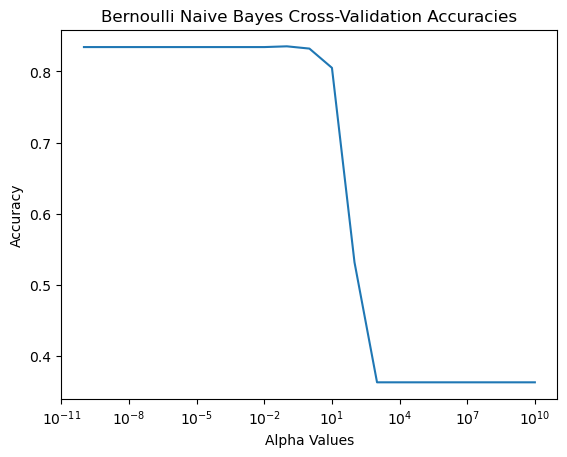

In [17]:
plt.semilogx(alpha_values,cv_scores_bernoulli)
plt.title("Bernoulli Naive Bayes Cross-Validation Accuracies")
plt.xlabel("Alpha Values")
plt.ylabel("Accuracy")
plt.show()

Accuracy: 0.8154158215010142


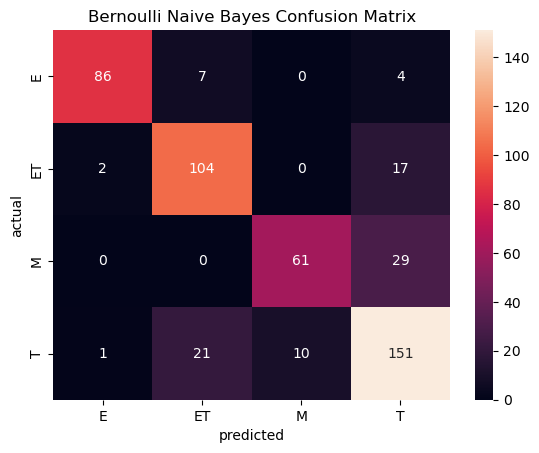

In [52]:
# With the highest accuracy alpha value known, the model is trained and tested.
bernoulli_nb = BernoulliNB(alpha=alpha_values[highest_alpha])
bernoulli_nb.fit(X_train,y_train)

predictions = bernoulli_nb.predict(X_test)

# A confusion matrix is made to show how the model fared at predicting new data.
data = {"y_predicted":predictions,"y_actual":y_test}
df_conf = pd.DataFrame(data,columns = ['y_actual','y_predicted'])
confusion_matrix = pd.crosstab(df_conf['y_actual'],df_conf['y_predicted'],
                              rownames=['actual'],colnames=['predicted'])

sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.title("Bernoulli Naive Bayes Confusion Matrix")

print('Accuracy:',bernoulli_nb.score(X_test,y_test))

Out of 493 predictions, 402 of them were correct and 91 of them were incorrect. As shown above, this results in an overall accuracy of ~81.5%. Further analysis is done to find the precision and recall of each category.

In [19]:
# Calculating the precision of each category...

# precision_totals is found by summing the values in each column (i.e., the total number of predictions for each rating)
# precision_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 88)
# TP stands for True Positive, which refers to predictions that were correct.
precision_totals = [i for i in confusion_matrix.sum(axis=0)]
precision_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the precision.
for idx,val in enumerate(confusion_matrix):
    print(val,"precision:",(precision_TPs[idx]/precision_totals[idx]))

E precision: 0.9662921348314607
ET precision: 0.7878787878787878
M precision: 0.8591549295774648
T precision: 0.7512437810945274


The "T" category has the lowest precision, meaning that if the model predicted that a game was rated "T", it was more likely to be wrong. Conversely, the precision of the "E" category was the highest at 96.6%, meaning that if the model predicted that a game was rated "E", it was almost certainly correct. 
The overall order, in terms of greatest to least precision, is: E, M, ET, T.

In [20]:
# Calculating the recall of each category...

# recall_totals is found by summing the values in each row (i.e., the total number of actual games/records for each rating)
# recall_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 88)
# TP stands for True Positive, which refers to predictions that were correct.
recall_totals = [i for i in confusion_matrix.sum(axis=1)]
recall_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the recall.
for idx,val in enumerate(confusion_matrix):
    print(val,"recall:",(recall_TPs[idx]/recall_totals[idx]))

E recall: 0.8865979381443299
ET recall: 0.8455284552845529
M recall: 0.6777777777777778
T recall: 0.825136612021858


The "M" category has the lowest recall, meaning that the model struggled with classifying games that were rated "M" the most. Out of the 90 games that were actually rated "M", the model predicted 29 of them were rated "T", thus resulting in a recall of ~67.8%. The "E" category has the highest recall at ~88.7%, meaning that out of the 97 games that were actually rated "E", the model successfully classified 86 of them. This means that the model is rather good at classifying games that are rated "E".
The overall order, in terms of greatest to least recall, is: E, ET, T, M

In [21]:
# Printing a classification report to summarize the information above; this also shows the f1-score for each class.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           E       0.97      0.89      0.92        97
          ET       0.79      0.85      0.82       123
           M       0.86      0.68      0.76        90
           T       0.75      0.83      0.79       183

    accuracy                           0.82       493
   macro avg       0.84      0.81      0.82       493
weighted avg       0.82      0.82      0.82       493



The highest f1-score (which is a method of averaging precision and recall) belongs to E (92%) while the lowest f1-score is M (76%). The order of f1-scores from greatest to least is: E, ET, T, M

The support column indicates how many instances there were of each class in the testing dataset.

Once again, the overall accuracy of the Bernoulli Naive Bayes model is ~82%.

# Other Notes about Model #1: Bernoulli Naive Bayes

Interestingly, whenever the "M" rating was involved with a prediction (i.e., the game either is actually rated "M" or the model predicts that it is rated "M"), mistakes in the predictions only ever occurred with the "T" category. In other words, if a game was predicted as being rated "M", the game was either actually rated "M" or it was rated "T". Similarly, if a game was actually rated "M", it was either predicted as being rated "M" or predicted as being rated "T". This shows that the model can successfully determine which descriptors for a video game are not suitable for children, even if it cannot fully differentiate between themes that are more suitable for Teens and Mature audiences as well. For a rating system, this would be a desirable outcome, since you would not be wrongly classifying mature content well below its recommended/target audience.

In general, most mistakes with the model involve the "T" rating. Out of the 91 incorrect predictions that the model made, 82 of them were related to the "T" rating in some way. 32 of these incorrect predictions were "T" rated games being rated as something else, and the remaining 50 were "E", "ET", and "M" rated games incorrectly being classified as being rated "T".

# Model #2: Multinomial Naive Bayes
Another version of Naive Bayes is used to compare the performance between two versions of the same algorithm.

In [22]:
# The data is split from the original DataFrames again to ensure that the algorithm starts with a fresh version of the data.
# Splitting the training data
X_train = esrb_train.drop(["title", "console", "esrb_rating"], axis=1)
y_train = esrb_train['esrb_rating']

# Splitting the testing data
X_test = esrb_test.drop(['title', 'console', 'esrb_rating'], axis=1)
y_test = esrb_test['esrb_rating']

In [23]:
# A logarithmic sweep of alpha values is created to see which is best for the model.
alpha_values = np.logspace(-10,10,num=21)
cv_scores_multinomial = []

for i in alpha_values:
    m_nb = MultinomialNB(alpha=i)
    m_nb.fit(X_train,y_train)
    
    # 5 folds were chosen for the cross validation process.
    score = cross_val_score(m_nb,X_train,y_train,cv=5,scoring='accuracy')
    cv_scores_multinomial.append(np.mean(score))

# Store the alpha value that gave the highest accuracy
highest_alpha = np.argmax(cv_scores_multinomial)
print("Alpha index with highest accuracy:",highest_alpha)
print("Accuracy scores per alpha value:")
for idx,val in enumerate(alpha_values):
    print('{:.2e}'.format(Decimal(val)),": ",cv_scores_multinomial[idx])

Alpha index with highest accuracy: 9
Accuracy scores per alpha value:
1.00e-10 :  0.8263784637959253
1.00e-9 :  0.8263784637959253
1.00e-8 :  0.8263784637959253
1.00e-7 :  0.8263784637959253
1.00e-6 :  0.8263784637959253
1.00e-5 :  0.8263784637959253
1.00e-4 :  0.8263784637959253
1.00e-3 :  0.8263784637959253
1.00e-2 :  0.8263784637959253
1.00e-1 :  0.827439471753485
1.00e+0 :  0.8274366499238106
1.00e+1 :  0.8125726621141147
1.00e+2 :  0.7557381906428129
1.00e+3 :  0.36271798634234437
1.00e+4 :  0.36271798634234437
1.00e+5 :  0.36271798634234437
1.00e+6 :  0.36271798634234437
1.00e+7 :  0.36271798634234437
1.00e+8 :  0.36271798634234437
1.00e+9 :  0.36271798634234437
1.00e+10 :  0.36271798634234437


This time the highest alpha value was also 1.00e-1 (which is at index 9 in the list of alpha values). The alpha values are also graphed below.

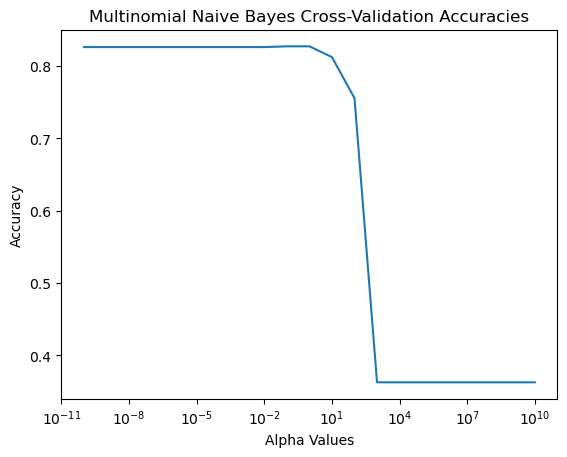

In [24]:
plt.semilogx(alpha_values,cv_scores_multinomial)
plt.title("Multinomial Naive Bayes Cross-Validation Accuracies")
plt.xlabel("Alpha Values")
plt.ylabel("Accuracy")
plt.show()

Accuracy: 0.7931034482758621


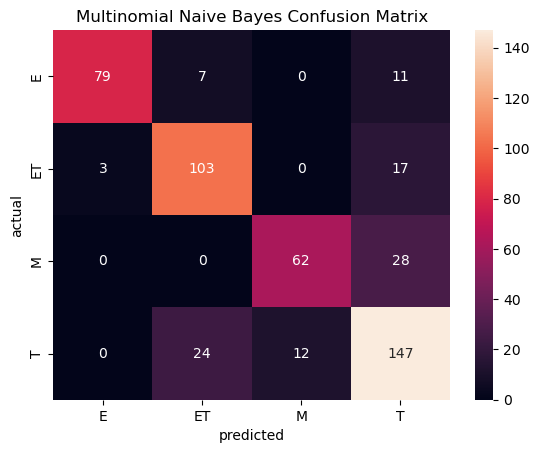

In [53]:
# With the highest accuracy alpha value known, the model is trained and tested.
multinomial_nb = MultinomialNB(alpha=alpha_values[highest_alpha])
multinomial_nb.fit(X_train,y_train)

mnb_predictions = multinomial_nb.predict(X_test)

# A confusion matrix is made to show how the model fared at predicting new data.
data = {"y_predicted":mnb_predictions,"y_actual":y_test}
df_conf = pd.DataFrame(data,columns = ['y_actual','y_predicted'])
confusion_matrix = pd.crosstab(df_conf['y_actual'],df_conf['y_predicted'],
                              rownames=['actual'],colnames=['predicted'])

sns.heatmap(confusion_matrix,annot=True,fmt='d',)
plt.title("Multinomial Naive Bayes Confusion Matrix")

print('Accuracy:',multinomial_nb.score(X_test,y_test))

Compared to the previous Bernoulli Naive Bayes model, the Multinomial model has a lower accuracy.
Bernoulli accuracy: 81.54%
Multinomial accuracy: 79.31%
Out of 493 predictions, 391 of them were correct and 102 of them were incorrect. As discussed, this results in an overall accuracy of ~79.31%. Further analysis is done to find the precision and recall of each category.

In [26]:
# Calculating the precision of each category...

# precision_totals is found by summing the values in each column (i.e., the total number of predictions for each rating)
# precision_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 80)
# TP stands for True Positive, which refers to predictions that were correct.
mnb_precision_totals = [i for i in confusion_matrix.sum(axis=0)]
mnb_precision_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the precision.
for idx,val in enumerate(confusion_matrix):
    print(val,"precision:",(mnb_precision_TPs[idx]/mnb_precision_totals[idx]))

E precision: 0.9634146341463414
ET precision: 0.7686567164179104
M precision: 0.8378378378378378
T precision: 0.7241379310344828


The "T" category has the lowest precision once again, meaning that if the model predicted that a game was rated "T", it was more likely to be wrong. Conversely, the precision of the "E" category was the highest at 96.3%, meaning that if the model predicted that a game was rated "E", it was almost certainly correct. 

The overall order, in terms of greatest to least precision, is: E, M, ET, T.

This is the same order as the Bernoulli Naive Bayes model.

In [27]:
# Calculating the recall of each category...

# recall_totals is found by summing the values in each row (i.e., the total number of actual games/records for each rating)
# recall_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 88)
# TP stands for True Positive, which refers to predictions that were correct.
recall_totals = [i for i in confusion_matrix.sum(axis=1)]
recall_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the recall.
for idx,val in enumerate(confusion_matrix):
    print(val,"recall:",(recall_TPs[idx]/recall_totals[idx]))

E recall: 0.8144329896907216
ET recall: 0.8373983739837398
M recall: 0.6888888888888889
T recall: 0.8032786885245902


The "M" category has the lowest recall, meaning that the model struggled with classifying games that were rated "M" the most. Out of the 90 games that were actually rated "M", the model predicted 28 of them were rated "T", thus resulting in a recall of ~68.9%. This is exactly 1 prediction better than the Bernoulli Naive Bayes model did when it came to the recall of "M" rated games.

The "ET" category has the highest recall at 83.7%, meaning that out of the 123 games that were actually rated "ET", the model successfully classified 103 of them. This means that the model is rather good at classifying games that are rated "ET".


The overall order, in terms of greatest to least recall, is: ET, E, T, M.

This order is different than the Bernoulli Naive Bayes model, where "E" performed better than "ET".

In [28]:
# Printing a classification report to summarize the information above; this also shows the f1-score for each class.
print(classification_report(y_test, mnb_predictions))

              precision    recall  f1-score   support

           E       0.96      0.81      0.88        97
          ET       0.77      0.84      0.80       123
           M       0.84      0.69      0.76        90
           T       0.72      0.80      0.76       183

    accuracy                           0.79       493
   macro avg       0.82      0.79      0.80       493
weighted avg       0.80      0.79      0.79       493



The highest f1-score (which is a method of averaging precision and recall) belongs to E (88%) while the lowest f1-score is a tie between M and T (76%). The highest f1-score lowered by 4% between the Bernoulli model and this one, but the lowest f1-score did not change. The order of the f1-scores is (from highest to lowest): E, ET, M and T.

The support column indicates how many instances there were of each class in the testing dataset and does not change between models.

Once again, the overall accuracy of the Multinomial Naive Bayes model is ~79%, which is lower than the Bernoulli Naive Bayes model.

# Other Notes about Model #2: Multinomial Naive Bayes

Much like the Bernoulli Naive Bayes model, whenever the "M" rating was involved with a prediction (i.e., the game either is actually rated "M" or the model predicts that it is rated "M"), mistakes in the predictions only ever occurred with the "T" category. This shows that this model can also successfully determine which descriptors for a video game are not suitable for children, even if they cannot fully differentiate between themes that are more suitable for Teens and Mature audiences as well.

Once again, most mistakes with the model involve the "T" rating. Out of the 102 incorrect predictions that the model made, 92 of them were related to the "T" rating in some way. 36 of these incorrect predictions were "T" rated games being rated as something else, and the remaining 56 were "E", "ET", and "M" rated games incorrectly being classified as being rated "T".

Overall, the Multinomial Naive Bayes model seems to have performed worse slightly than the Bernoulli Naive Bayes model in nearly every way. The chart below shows that the CV score/accuracy of the best alpha value in the Bernoulli model was higher than the best CV score/accuracy of the best alpha value in the Multinomial model. Interestingly, the Bernoulli model seems to more rapidly decrease in accuracy around the 10^2 mark when compared to the Multinomial model, though since only the best performing alpha values were used for both models, this doesn't mean much.

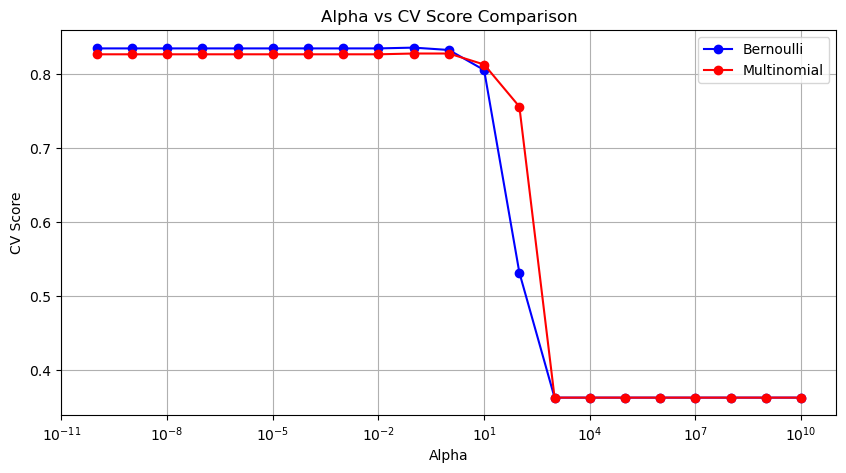

In [29]:
plt.figure(figsize=(10, 5))
plt.semilogx(alpha_values, cv_scores_bernoulli, marker='o', linestyle='-', color='blue', label='Bernoulli')
plt.semilogx(alpha_values, cv_scores_multinomial, marker='o', linestyle='-', color='red', label='Multinomial')
plt.title('Alpha vs CV Score Comparison')
plt.xlabel('Alpha')
plt.ylabel('CV Score')
plt.legend()
plt.grid(True)
plt.show()

# Model #3: Decision Tree

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

### Decision Tree with Max Depth Equal to Number of Features (31)

This deep tree is likely to capture intricate patterns and details in the training data using every feature to classify the ratings of the games, potentially leading to overfitting.

In [31]:
num_features = X_train.shape[1]
print("Number of features:", num_features)

Number of features: 31


In [32]:
my_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 31, random_state=42)
my_tree.fit(X_train, y_train)
cross_val_score(my_tree, X_train, y_train, cv=10)

array([0.77777778, 0.84126984, 0.84656085, 0.88829787, 0.84042553,
       0.88297872, 0.87765957, 0.88829787, 0.89361702, 0.85106383])

In this 10-fold cross-validation, the training data is split into 10 folds, and the model is trained and evaluated 10 times, each time using a different fold as the test set and the remaining folds as the training set. The array contains the accuracy scores for each of these 10 iterations. These scores provide insights into the model's performance across different subsets of the training data. The variation in scores helps assess how well the model generalizes to different parts of the dataset. In this case, the accuracy scores range from approximately 77.78% to 89.36% across the folds.

In [33]:
dt_predictions = my_tree.predict(X_test)
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           E       0.95      0.95      0.95        97
          ET       0.79      0.91      0.85       123
           M       0.86      0.67      0.75        90
           T       0.80      0.81      0.80       183

    accuracy                           0.84       493
   macro avg       0.85      0.83      0.84       493
weighted avg       0.84      0.84      0.83       493



Precision: Indicates the accuracy of positive predictions. In this context, precision is crucial, especially for higher age ratings (T, M). You want to minimize false positives, ensuring that games rated for older audiences are correctly identified to avoid exposing younger players to inappropriate content. Here we can see that "T" = .8 and "M" = .86, which are decent metrics.

Recall: Reflects the model's ability to capture all positive instances. Recall is important for lower age ratings ("E", "ET"). You want to minimize false negatives to ensure that games suitable for younger audiences are not incorrectly restricted. Here we see that "E" = .95 and "ET" = .91, which are great metrics.

F1-Score: Represents the mean of precision and recall, acting as a balance between the two. F1-scores range from 0.75 to 0.95, with rating "E" having the highest F1-score and M having the lowest. This could be due to "T" and "M" being mixed up whereas "ET" and "E" are not due to better descriptors.

Support: Indicates the number of actual instances of each class in the test set.

Accuracy: The overall accuracy of the model is 0.84, meaning that 84% of all instances were correctly classified.

Macro Avg and Weighted Avg: These are the average scores across all classes. The macro average gives equal weight to all classes, while the weighted average considers the number of instances in each class. Both are around 0.84, suggesting a reasonable overall performance.

The model seems to perform well, with high precision and recall for class E and generally good performance across other classes. However, it's important to consider the specific goals and requirements of your application, as precision and recall trade-offs may need to be tailored to specific use cases. Additionally, further analysis or fine-tuning may be warranted based on the specific context of your classification problem.

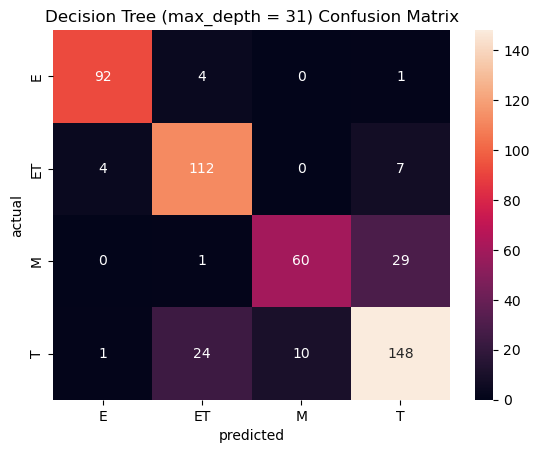

In [34]:
tree_conf_matrix = confusion_matrix(y_test, dt_predictions)
class_names = ['E','ET','M','T']

sns.heatmap(tree_conf_matrix,annot=True,fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Decision Tree (max_depth = 31) Confusion Matrix')
plt.show()

Here we can see the confusion matrix for the model using all features and 31 levels. 

The model seems to only struggle with classification concerning "T" ratings, with the most discepencies from predicting "T" when it was actually "M" (29) and predicting "ET" when it was actually "T" (26). Other than this, the model is fairly accurate.

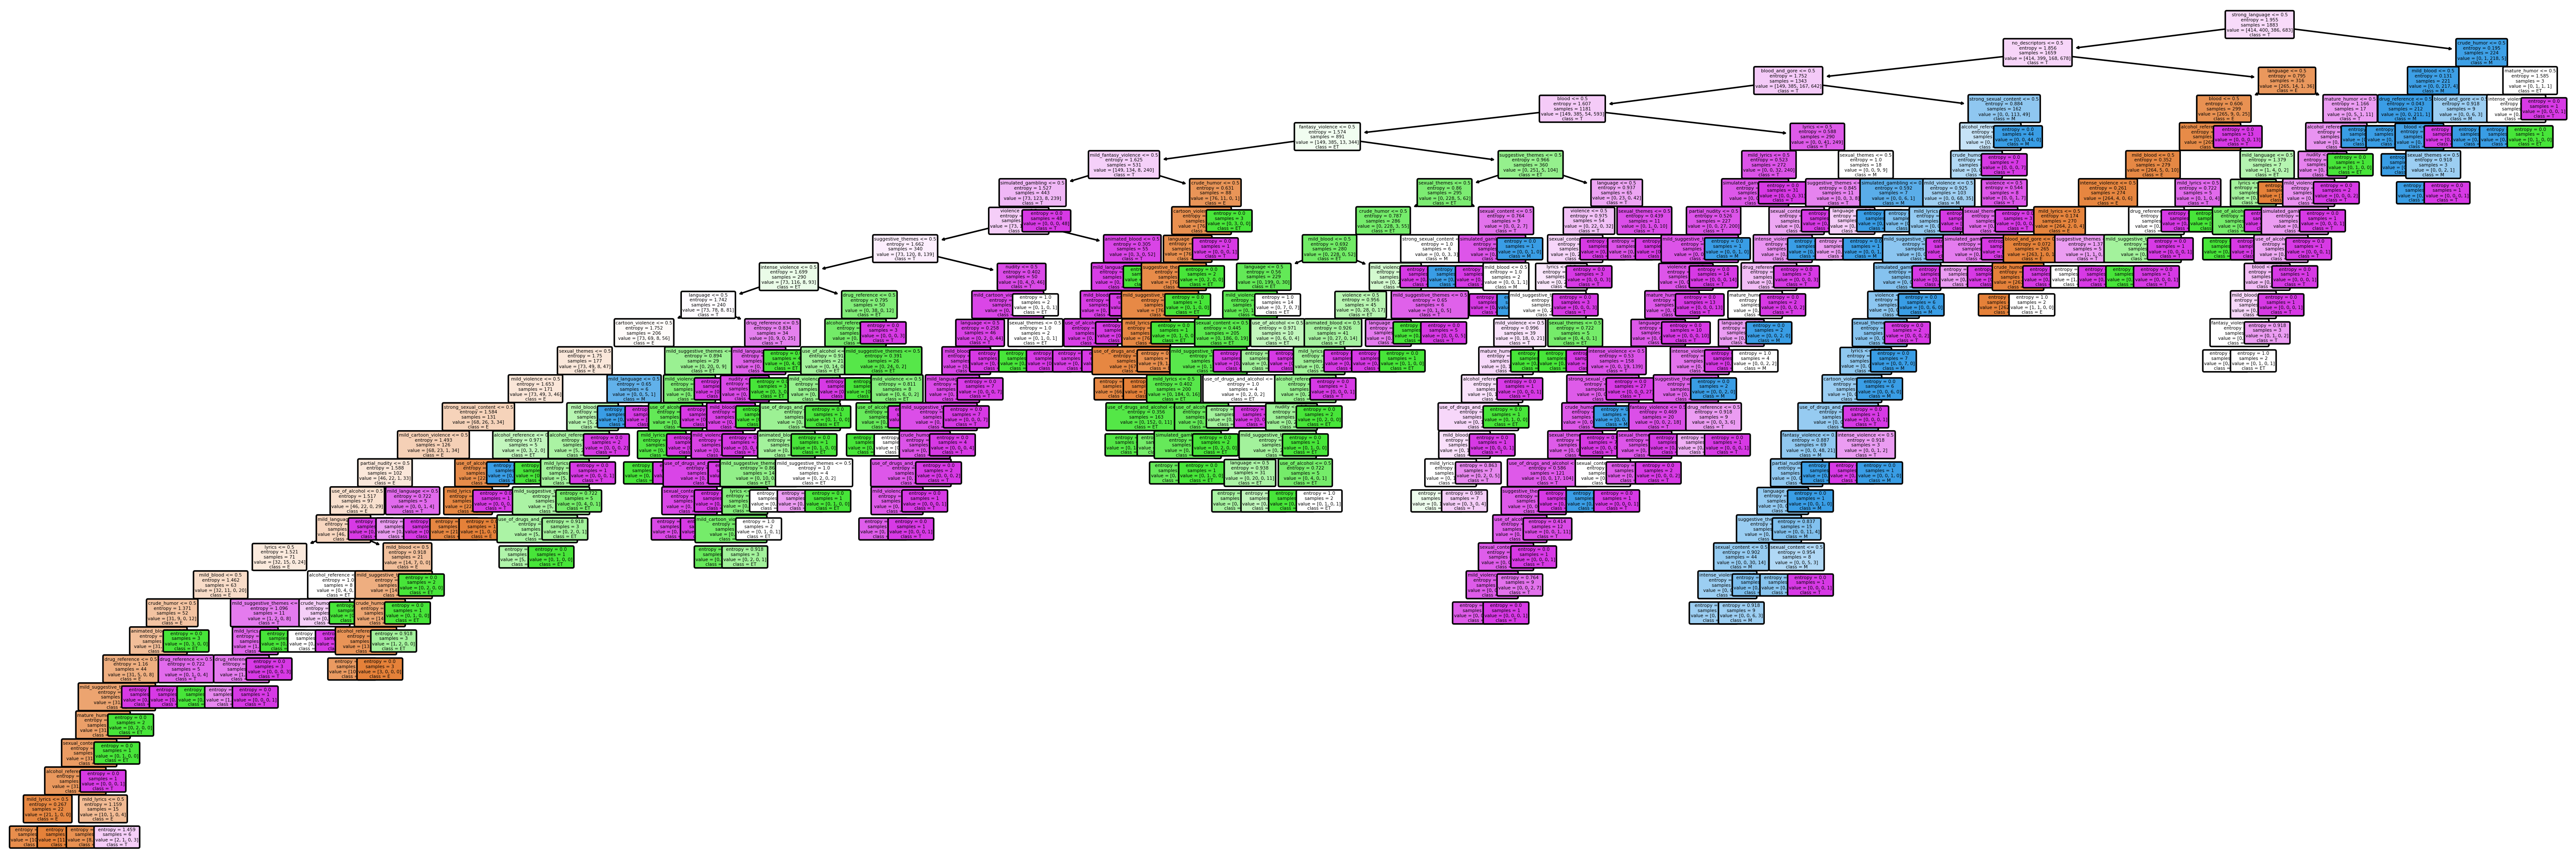

In [35]:
feature_names = X_train.columns.tolist()

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30,10), dpi = 2**8-1)
tree.plot_tree(my_tree, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=3)
plt.show()

Here we can see the plot of the tree. 
As expected for a decision tree model with 31 levels, this would be a pain to traverse. Now we'll look into feature selection to use for a tree with only 5 levels. Also if you zoom in, you can see that entropy is still decently high on the leaf nodes; this is illustrated by the colors' contrast - if faded, high entropy, if  solid color, low entropy.



### Decsion Tree with 5 Levels and Features

In [36]:
feature_importances = my_tree.feature_importances_
print(feature_importances)

[0.01661951 0.00631013 0.11979697 0.10376521 0.01092049 0.02287547
 0.01098195 0.06069086 0.02275356 0.03376169 0.00844061 0.00555059
 0.02182764 0.00533682 0.0411776  0.00935669 0.01660229 0.01455165
 0.01511005 0.1497697  0.00240412 0.00466972 0.00549443 0.01995591
 0.01804686 0.17534693 0.01605033 0.03013411 0.01072813 0.00202776
 0.01894224]


In [37]:
feature_names = X_train.columns.tolist()
print(feature_names)

['alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference', 'fantasy_violence', 'intense_violence', 'language', 'lyrics', 'mature_humor', 'mild_blood', 'mild_cartoon_violence', 'mild_fantasy_violence', 'mild_language', 'mild_lyrics', 'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity', 'partial_nudity', 'sexual_content', 'sexual_themes', 'simulated_gambling', 'strong_language', 'strong_sexual_content', 'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol', 'violence']


In [38]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

important_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]
important_features_sorted = important_features.sort_values(by='Importance', ascending=False)

print(important_features_sorted)

             Feature  Importance
25   strong_language    0.175347
19    no_descriptors    0.149770
2              blood    0.119797
3     blood_and_gore    0.103765
7   fantasy_violence    0.060691


Using an importance cut-off of 5% contribution to the model, we are able to find the 5 most important features: strong_language, no_descriptors, blood, blood_and_gore, and fantasy_violence. Some of these descriptors are mostly self-explanatory, though I would assume no_descriptors is so important because there are a lot of "E" rated games without descriptors. I also assume the difference between blood and blood_and_gore is the difference between a game being rated "T" or "M".

In [39]:
top_features = feature_importance_df.nlargest(5, 'Importance')['Feature']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [40]:
my_tree_importance = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
my_tree_importance.fit(X_train_top, y_train)
my_tree_importance.score(X_test_top, y_test)

0.7139959432048681

Accuracy has decreased from 84% to 71% with these changes, which was expected. This is the cost of making an easier traversal for the decision tree, though it isn't too substantial of a difference.

In [41]:
cross_val_score(my_tree_importance, X_train_top, y_train, cv=10)

array([0.64550265, 0.69312169, 0.66137566, 0.71808511, 0.70212766,
       0.71808511, 0.75531915, 0.7606383 , 0.78191489, 0.72340426])

In this 10-fold cross-validation, the accuracy ranges from 64.55% to 78.19% as opposed to the previous range of 77.78% to 89.36% across the folds. About a 10% decrease in the range as well overall.

In [42]:
predictions_importance = my_tree_importance.predict(X_test_top)
print(classification_report(y_test, predictions_importance))

              precision    recall  f1-score   support

           E       0.94      0.49      0.65        97
          ET       0.82      0.74      0.78       123
           M       0.82      0.72      0.77        90
           T       0.59      0.81      0.68       183

    accuracy                           0.71       493
   macro avg       0.79      0.69      0.72       493
weighted avg       0.76      0.71      0.71       493



Precision: Indicates the accuracy of positive predictions. In this context, precision is crucial, especially for higher age ratings (T, M). You want to minimize false positives, ensuring that games rated for older audiences are correctly identified to avoid exposing younger players to inappropriate content. Here we can see that T = .59 and M = .82, which are notably worse than the 31 level tree (T = .8 and M = .86).

Recall: Reflects the model's ability to capture all positive instances. Recall is important for lower age ratings (E, ET). You want to minimize false negatives to ensure that games suitable for younger audiences are not incorrectly restricted. Here we see that E = .49 and ET = .74, which are significant drops compared to the 31 level tree (E = .95 and ET = .91).

F1-Score: Represents the mean of precision and recall, acting as a balance between the two. F1-scores range from 0.65 to 0.77 (compared to 0.75 to 0.95), with rating ET having the highest F1-score (no longer E) and E having the lowest (no longer M).

Support: Indicates the number of actual instances of each class in the test set.

Accuracy: The overall accuracy of the model is 0.71, meaning that 71% of all instances were correctly classified.

Macro Avg and Weighted Avg: These are the average scores across all classes. The macro average gives equal weight to all classes, while the weighted average considers the number of instances in each class. Both are around 0.72, suggesting a reasonable overall performance.

In summary, the model seems to perform well, with high precision but middling recall for class E and generally good performance across other classes. However, it's important to consider the specific goals and requirements of your application, as precision and recall trade-offs may need to be tailored to specific use cases. Additionally, further analysis or fine-tuning may be warranted based on the specific context of your classification problem.

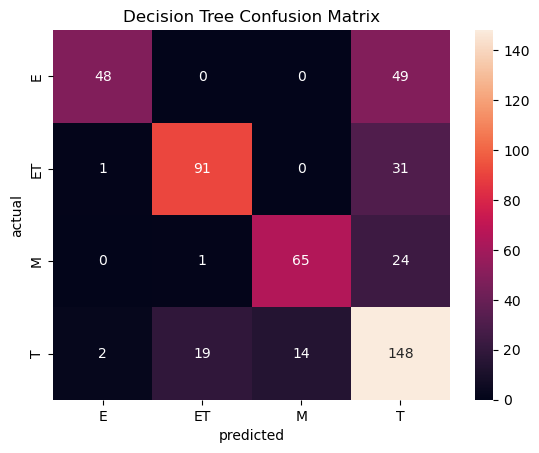

In [43]:
tree2 = confusion_matrix(y_test, predictions_importance)

sns.heatmap(tree2, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Here we can see the confusion matrix for the model, which uses only 5 features and levels. 

The model overall seems to struggle with classifying "T" ratings, as 49 "E", 31 "ET", and 24 "M" actual ratings are predicted to be rated "T" when they are not. There were also 35 ratings that were actually "T", which were instead predicted as 2 "E", 19 "ET" and 14 "M" ratings. 

However, the model is very good at distinguishing between "E", "ET", and "M" (looking only at the 3x3), with only 1 instance of an "M" being predicted as "ET" and an "ET" predicted as "E". In fact, it is slightly better than the 31 level model in this regard.

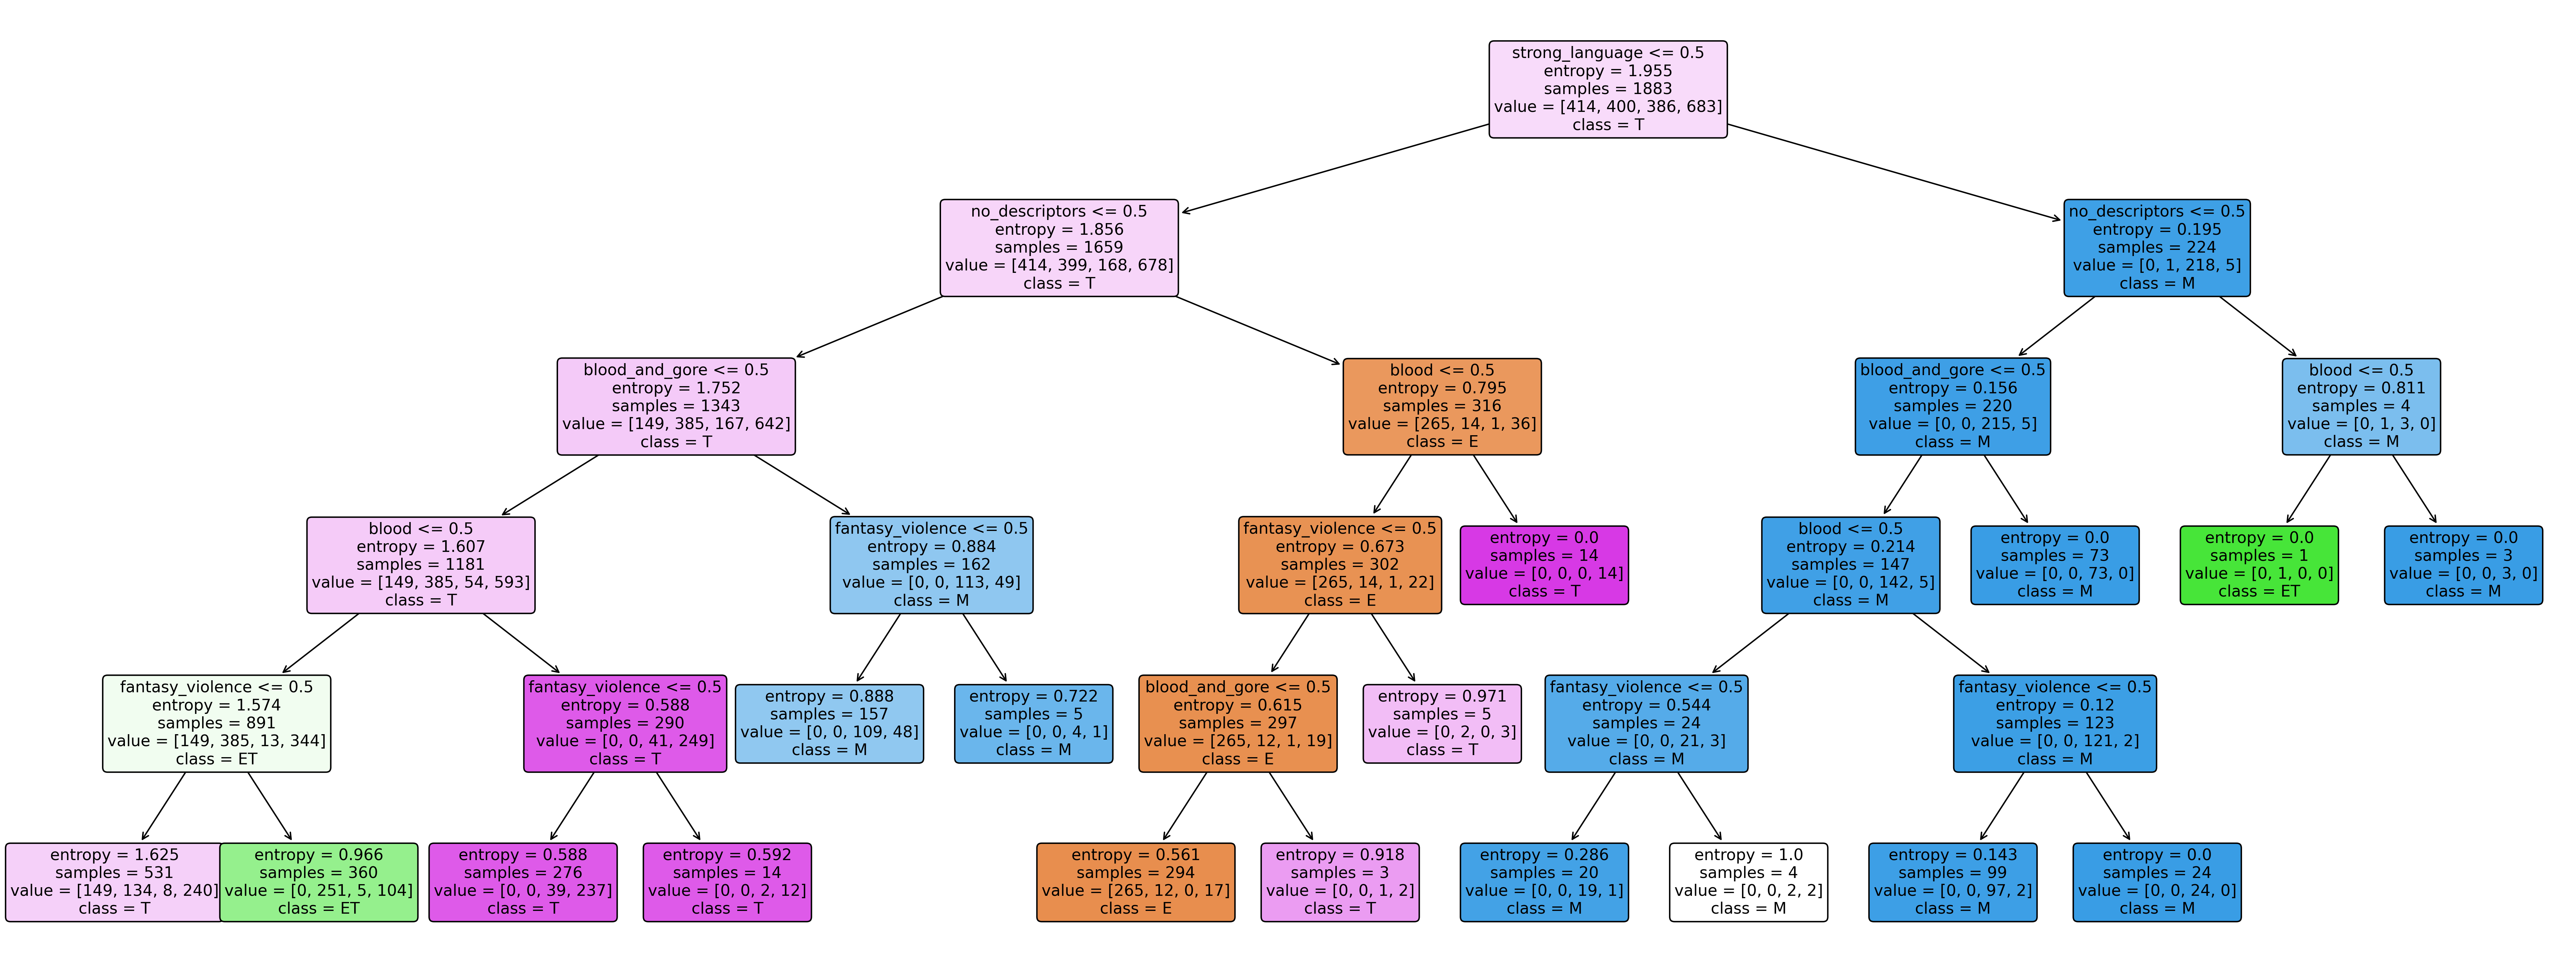

In [44]:
feature_names = X_train_top.columns.tolist()
class_names = ["E","ET","M","T"]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (32,12), dpi = 300)
tree.plot_tree(my_tree_importance, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=11)
plt.show()

This tree is much more traveserable and we can see it starts with the most important features and procedes to the least important ones, with only 5 features and 5 levels. However, the errors in the data start to show! For example, lets say our game has strong language, so we go left. Next is no_descriptors, but at this point everything should have a descriptor if it has strong language. 

Continuing onto something that makes more sense, if we say there are no descriptors, the tree checks for if there is blood, fantasy violence, and finally blood and gore. If we say yes to any of these, then we end up with an "T" rating, otherwise we get an "E" rating.

We also see where "T" and "M" are mixed up as we traverse from the top to the left to blood and gore. If we say there is blood and gore and traverse to if there is fantasy violence, if we say no, then it is classified as "M" even though there are 48 "T" ratings.

There is still a good amount of entropy within the leaf nodes, meaning that more than 5 features or levels would be beneficial to the model's accuracy, though we know that by using all features and 31 levels, the accuracy would only increase up to 84% instead of the 71% with 5 features and levels.

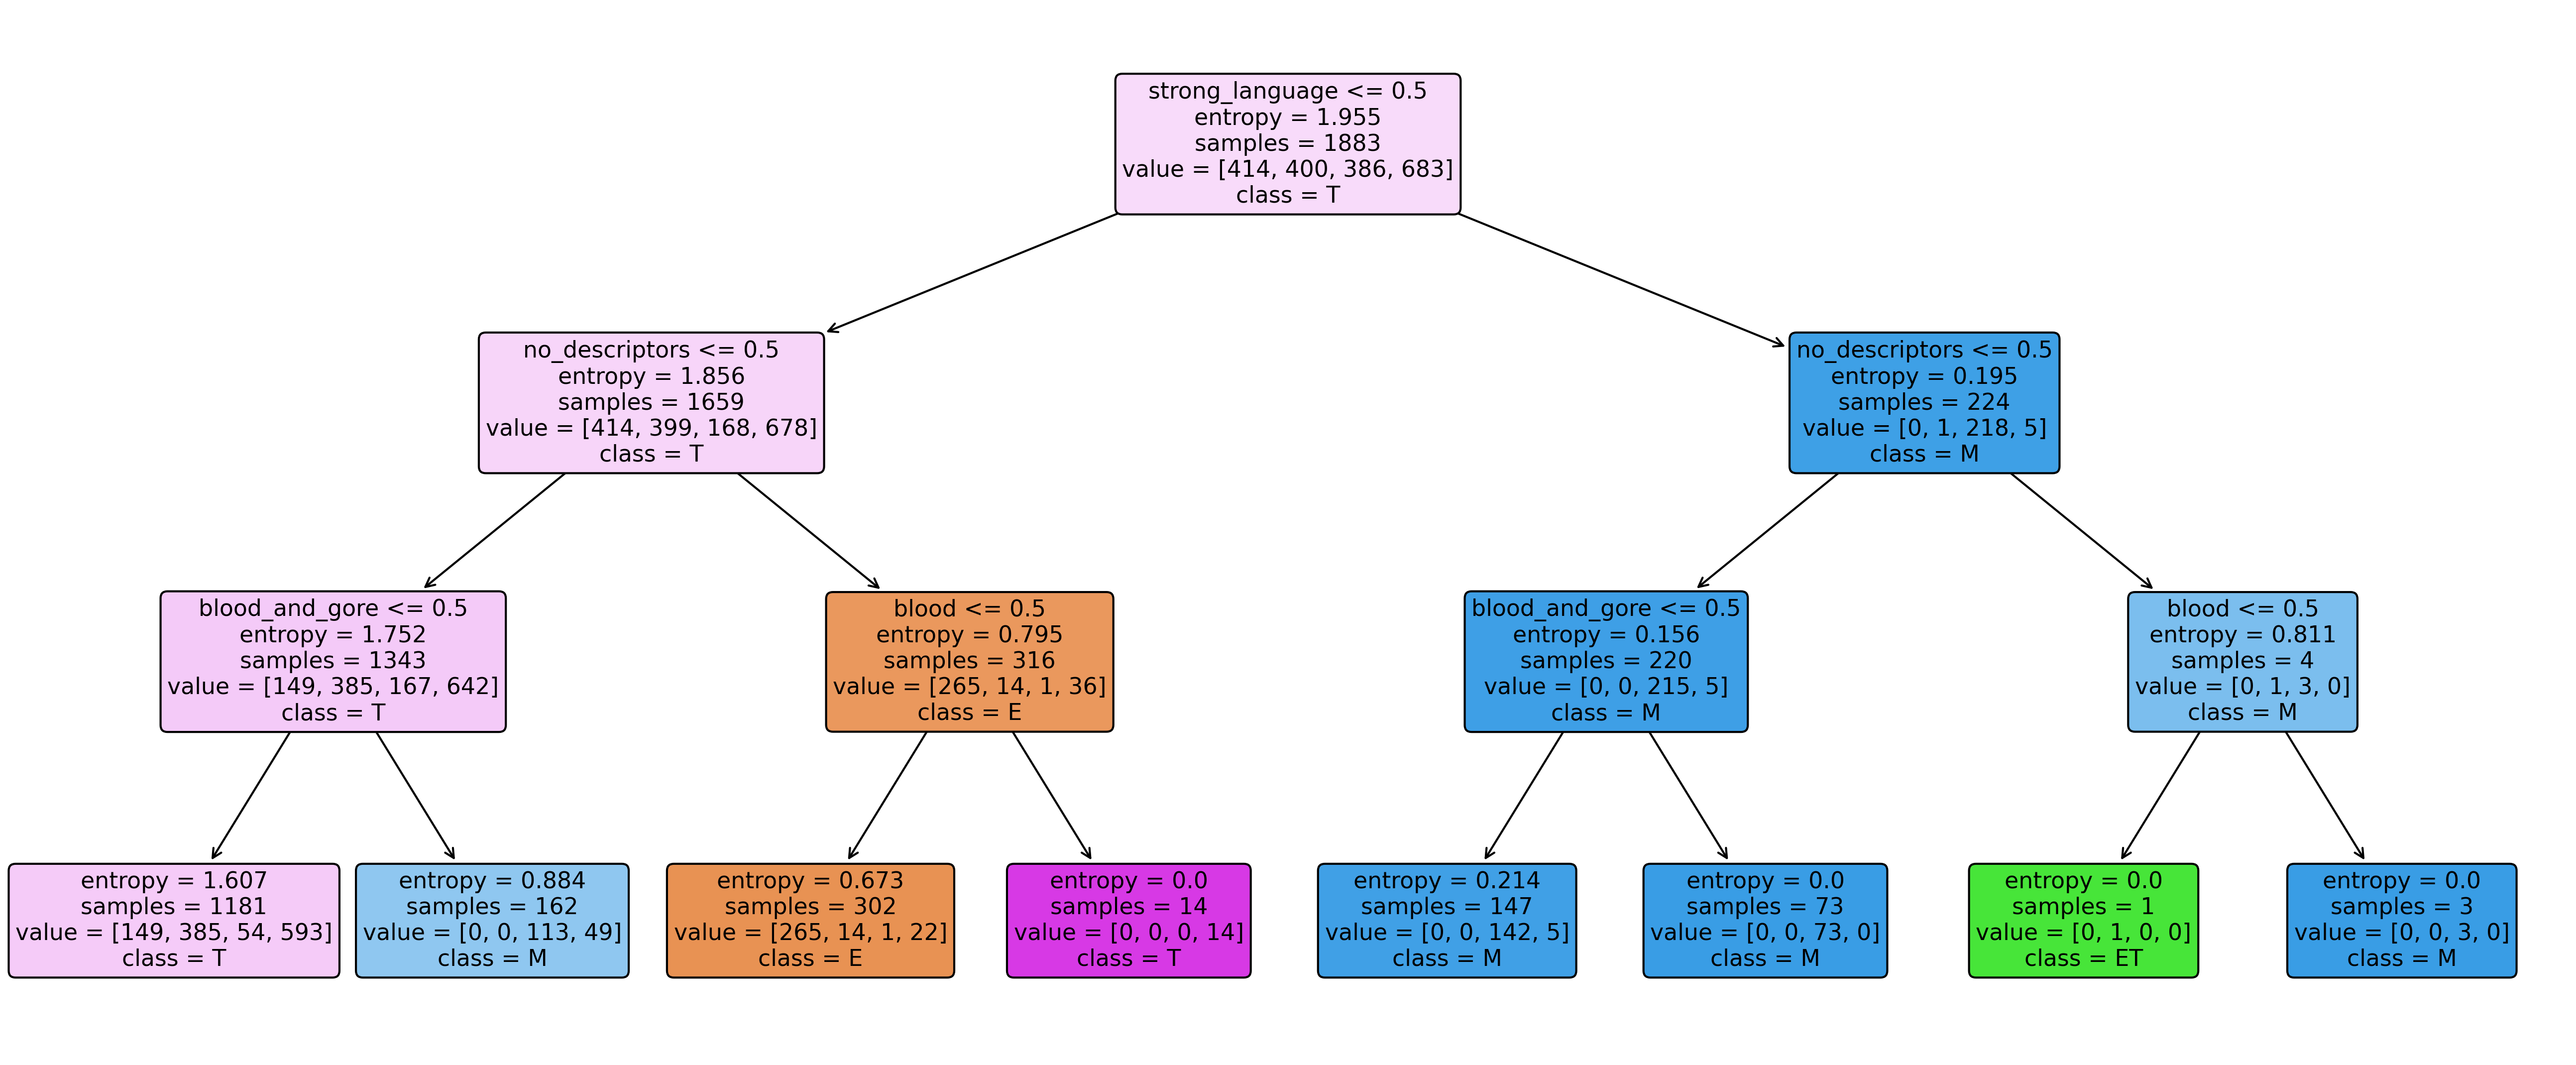

In [45]:
# A simplified version of the tree above. Its primary purpose is to improve readability for the first few layers.
feature_names = X_train_top.columns.tolist()
class_names = ["E","ET","M","T"]

my_tree_simple = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
my_tree_simple.fit(X_train_top, y_train)


fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (22,9), dpi = 300)
tree.plot_tree(my_tree_simple, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=11)
plt.show()

# Model #4: Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Fitting the Classifier to teh Training set
model = RandomForestClassifier(criterion='entropy', random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

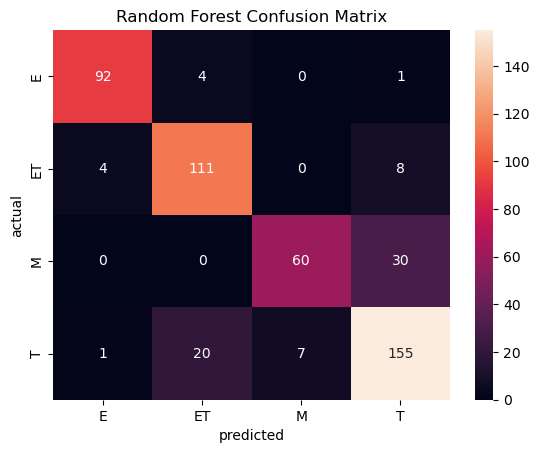

In [48]:
# Predicting the test set result
y_pred = model.predict(X_test)
# Making the Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [49]:
# The accuracy score for the model
model.score(X_test, y_test)

0.847870182555781

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           E       0.95      0.95      0.95        97
          ET       0.82      0.90      0.86       123
           M       0.90      0.67      0.76        90
           T       0.80      0.85      0.82       183

    accuracy                           0.85       493
   macro avg       0.87      0.84      0.85       493
weighted avg       0.85      0.85      0.85       493



For this model, the "T" rating is the one with the lowest precision at 80%; meanwhile, "E" has the highest precision at 95%. None of the precisions are particularly low, which shows that for any given class, if the model predicted that a game belonged to a particular rating, it was correct more often than not. The ranking, from greatest to least precision, is: E, M, ET, T

Similarly, the "E" rating is the one with the highest recall at 95%. However, the lowest recall belongs to the "M" rating at 67%. This is 18% below the next lowest recall, being "T" at 85%. This shows that the model is most likely to incorrectly label games that are actually rated "M". The ranking, from greatest to least recall, is: E, ET, T, M

The highest and lowest f1-scores are E (95%) and M (76%), respectively. The order for the f1-scores is the exact same as for recall.

The overall accuracy of the model is 85%, which is the best out of all of the models.